# PyCaret 2.2 Classification Template

Adapted by Katie Shakman from Reference Notebook: https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20Classification.ipynb


## 0. Packages

In [1]:
import pycaret
print('Using PyCaret Version', pycaret.__version__)
print('Path to PyCaret: ', pycaret.__file__)
import os
import pandas as pd
from pycaret.classification import *
from pycaret import datasets

Using PyCaret Version 2.2.0
Path to PyCaret:  /opt/conda/lib/python3.7/site-packages/pycaret/__init__.py


## 1. Load Data

### Option I: Use a pandas dataframe. 

In [2]:
data_path = os.path.join(os.environ['DOMINO_WORKING_DIR'], 'mushrooms.csv')
print('Data path: ', data_path)
data = pd.read_csv(data_path)
data.head()

Data path:  /mnt/mushrooms.csv


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
target_variable_name = 'YOUR_TARGET_VARIABLE_NAME_HERE' # Replace with the name of your target variable.

### Option II: Get a dataset from PyCaret's Data Repository.

#### Preview all available datasets in the repository.

In [4]:
all_datasets = pycaret.datasets.get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [5]:
dataset_name = 'heart_disease' # Replace with your desired dataset from the repo.
data = pycaret.datasets.get_data(dataset_name)

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
target_variable_name = all_datasets[all_datasets.Dataset==dataset_name]['Target Variable 1'].values[0]
print('Target: ', target_variable_name)

Target:  Disease


### Inspect the columns in your loaded dataset. 

In [7]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral in mg/dl      ', 'fasting blood sugar > 120 mg/dl ',
       'resting electrocardiographic results', 'maximum heart rate achieved  ',
       'exercise induced angina    ', 'oldpeak ', 'slope of peak',
       'number of major vessels ', 'thal', 'Disease'],
      dtype='object')

#### Note the target variable.  

## 2. Experiment Setup

In [8]:
clf1 = setup(data, 
             target = target_variable_name, # Replace with your target variable.
             session_id=123, 
             log_experiment=True, 
             experiment_name='experiment1', # Optionally replace with your desired experiment name.
             silent=True # Runs the command without waiting for user input. 
            )

,Description,Value
0,session_id,123
1,Target,Disease
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(270, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


## 3. Compare Baseline Models

In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
best_model = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8614,0,0.7861,0.8986,0.8284,0.7152,0.7296,0.077
lda,Linear Discriminant Analysis,0.8614,0.9066,0.7861,0.8986,0.8284,0.7152,0.7296,0.013
lr,Logistic Regression,0.8564,0.9105,0.8222,0.8612,0.8322,0.7084,0.7209,0.167
rf,Random Forest Classifier,0.8515,0.9148,0.8,0.8748,0.8263,0.6987,0.7124,0.169
nb,Naive Bayes,0.8404,0.8678,0.8083,0.8378,0.8116,0.6746,0.6864,0.012
catboost,CatBoost Classifier,0.8404,0.9139,0.775,0.8748,0.8073,0.6744,0.6931,7.73
et,Extra Trees Classifier,0.8246,0.9103,0.7708,0.8312,0.7891,0.6402,0.6533,0.139
xgboost,Extreme Gradient Boosting,0.819,0.8939,0.7611,0.8343,0.7872,0.6307,0.6425,0.382
lightgbm,Light Gradient Boosting Machine,0.8135,0.893,0.7736,0.8202,0.7839,0.621,0.6341,0.297
gbc,Gradient Boosting Classifier,0.8088,0.8906,0.7514,0.8187,0.7722,0.611,0.6238,0.084


Compare ensemble models only.

In [11]:
print('Ensemble models: ', models(type='ensemble').index.tolist())

models_to_include = models(type='ensemble').index.tolist()#.remove('gbr')
print(models_to_include)

ensembled_models = compare_models(include = models_to_include, fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8243,0.899,0.7619,0.8483,0.7973,0.6431,0.6526,7.67
rf,Random Forest Classifier,0.8137,0.9044,0.7619,0.8205,0.786,0.6218,0.6281,0.17
lightgbm,Light Gradient Boosting Machine,0.8031,0.8846,0.7381,0.8125,0.7697,0.5988,0.6053,0.2933
et,Extra Trees Classifier,0.7873,0.8877,0.7143,0.7949,0.7493,0.5659,0.5716,0.14
gbc,Gradient Boosting Classifier,0.782,0.8704,0.7381,0.7771,0.7541,0.5587,0.5627,0.0767
xgboost,Extreme Gradient Boosting,0.7764,0.867,0.7143,0.7839,0.7406,0.5453,0.5548,0.3267
ada,Ada Boost Classifier,0.7552,0.8336,0.7143,0.7412,0.7234,0.5045,0.5094,0.09


## 4. Train and tune specific models

In [12]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6842,0.6591,0.5,0.6667,0.5714,0.3294,0.338
1,0.8947,0.875,0.75,1,0.8571,0.7765,0.7966
2,0.8421,0.8466,0.875,0.7778,0.8235,0.6816,0.6854
3,0.7895,0.8011,0.875,0.7,0.7778,0.5824,0.5955
4,0.7895,0.7944,0.8889,0.7273,0.8,0.5824,0.5955
5,0.8947,0.8944,0.8889,0.8889,0.8889,0.7889,0.7889
6,0.8421,0.8333,0.6667,1,0.8,0.678,0.7161
7,0.7368,0.7333,0.6667,0.75,0.7059,0.4693,0.4719
8,0.6667,0.6875,0.875,0.5833,0.7,0.3571,0.3953
9,0.8333,0.8125,0.625,1,0.7692,0.6494,0.6934


In [13]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.9216,0.6471,0.8462,0.7333,0.5645,0.5783
1,0.8158,0.8655,0.7647,0.8125,0.7879,0.6254,0.6262
2,0.8947,0.9034,0.8824,0.8824,0.8824,0.7871,0.7871
3,0.8108,0.878,0.6875,0.8462,0.7586,0.6058,0.6146
4,0.8378,0.9147,0.8235,0.8235,0.8235,0.6735,0.6735
Mean,0.8297,0.8966,0.761,0.8421,0.7971,0.6513,0.656
SD,0.036,0.0215,0.0861,0.024,0.0522,0.0765,0.0723


In [14]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.8864,0.625,0.8333,0.7143,0.5529,0.5673
1,0.9474,1,0.875,1,0.9333,0.8902,0.8956
2,0.8947,0.9318,0.875,0.875,0.875,0.7841,0.7841
3,0.7368,0.8523,1,0.6154,0.7619,0.5026,0.5794
4,0.8947,0.8667,0.8889,0.8889,0.8889,0.7889,0.7889
5,0.9474,0.9444,0.8889,1,0.9412,0.8939,0.8989
6,0.8947,0.9111,0.7778,1,0.875,0.7865,0.8051
7,0.7895,0.8333,0.6667,0.8571,0.75,0.573,0.5866
8,0.8889,0.9875,1,0.8,0.8889,0.7805,0.8
9,0.8333,0.975,0.625,1,0.7692,0.6494,0.6934


In [15]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.7955,0.625,0.7143,0.6667,0.4509,0.4536
1,0.9474,0.9432,0.875,1,0.9333,0.8902,0.8956
2,0.8947,0.9432,0.875,0.875,0.875,0.7841,0.7841
3,0.7895,0.875,1,0.6667,0.8,0.5957,0.6513
4,0.8421,0.8556,0.8889,0.8,0.8421,0.6851,0.6889
5,0.9474,0.9556,0.8889,1,0.9412,0.8939,0.8989
6,0.9474,0.9444,0.8889,1,0.9412,0.8939,0.8989
7,0.7368,0.8556,0.5556,0.8333,0.6667,0.4633,0.4893
8,0.9444,0.975,1,0.8889,0.9412,0.8889,0.8944
9,0.7778,0.9625,0.625,0.8333,0.7143,0.5385,0.5534


## 5. Combine Models [Optional]

In [16]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.8125,0.5,0.8,0.6154,0.4311,0.4587
1,0.9474,0.9943,0.875,1,0.9333,0.8902,0.8956
2,0.8947,0.9432,0.875,0.875,0.875,0.7841,0.7841
3,0.7368,0.8864,0.875,0.6364,0.7368,0.4865,0.5114
4,0.8947,0.8833,0.8889,0.8889,0.8889,0.7889,0.7889
5,0.8421,0.8833,0.7778,0.875,0.8235,0.6816,0.6854
6,0.8421,0.9056,0.7778,0.875,0.8235,0.6816,0.6854
7,0.6842,0.85,0.4444,0.8,0.5714,0.3523,0.3906
8,0.8333,0.9562,1,0.7273,0.8421,0.6747,0.7135
9,0.7222,0.8,0.5,0.8,0.6154,0.4156,0.4438


In [17]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.7216,0.625,0.7143,0.6667,0.4509,0.4536
1,1,1,1,1,1,1,1
2,0.8421,0.8466,0.875,0.7778,0.8235,0.6816,0.6854
3,0.8421,0.8636,1,0.7273,0.8421,0.6919,0.7273
4,0.7895,0.7944,0.8889,0.7273,0.8,0.5824,0.5955
5,0.8947,0.8889,0.7778,1,0.875,0.7865,0.8051
6,0.8947,0.8889,0.7778,1,0.875,0.7865,0.8051
7,0.6842,0.6833,0.6667,0.6667,0.6667,0.3667,0.3667
8,0.7222,0.7375,0.875,0.6364,0.7368,0.4578,0.4842
9,0.8333,0.8125,0.625,1,0.7692,0.6494,0.6934


In [18]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.8636,0.625,0.7143,0.6667,0.4509,0.4536
1,1,1,1,1,1,1,1
2,0.8421,0.9318,0.875,0.7778,0.8235,0.6816,0.6854
3,0.8421,0.9205,1,0.7273,0.8421,0.6919,0.7273
4,0.8421,0.8556,0.8889,0.8,0.8421,0.6851,0.6889
5,0.8947,0.9222,0.7778,1,0.875,0.7865,0.8051
6,0.8947,0.9333,0.7778,1,0.875,0.7865,0.8051
7,0.7368,0.8,0.6667,0.75,0.7059,0.4693,0.4719
8,0.8333,0.95,1,0.7273,0.8421,0.6747,0.7135
9,0.8333,0.8875,0.625,1,0.7692,0.6494,0.6934


In [19]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.8523,0.625,0.7143,0.6667,0.4509,0.4536
1,0.9474,1,0.875,1,0.9333,0.8902,0.8956
2,0.8947,0.9318,0.875,0.875,0.875,0.7841,0.7841
3,0.7895,0.8068,1,0.6667,0.8,0.5957,0.6513
4,0.8947,0.8778,0.8889,0.8889,0.8889,0.7889,0.7889
5,0.9474,0.9444,0.8889,1,0.9412,0.8939,0.8989
6,0.8947,0.9111,0.7778,1,0.875,0.7865,0.8051
7,0.7368,0.8333,0.5556,0.8333,0.6667,0.4633,0.4893
8,0.8889,0.9625,1,0.8,0.8889,0.7805,0.8
9,0.7778,0.875,0.5,1,0.6667,0.5263,0.5976


## 6. AutoML [Optional]

In [20]:
# Select the best model based on the chosen metric
best = automl(optimize = 'AUC')
best

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

## 7. Analyze Models With Plots

### Interactive model evaluation including summary of hyperparameters and selectable visualizations

In [21]:
evaluate_model(best)

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,gini
max_depth,4
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0005
min_impurity_split,None


### Individual plots 

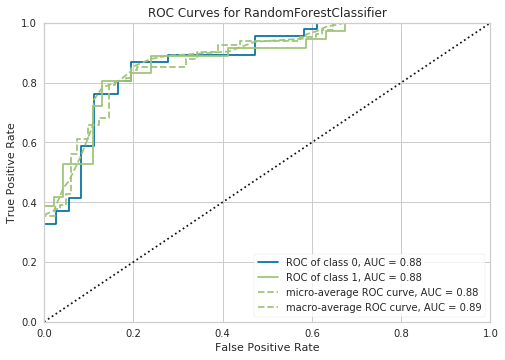

In [22]:
plot_model(best)

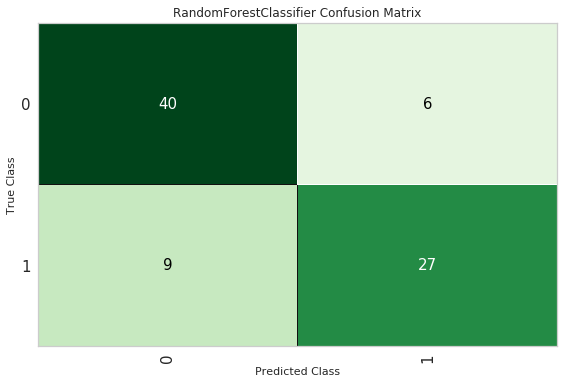

In [23]:
plot_model(best, plot = 'confusion_matrix')

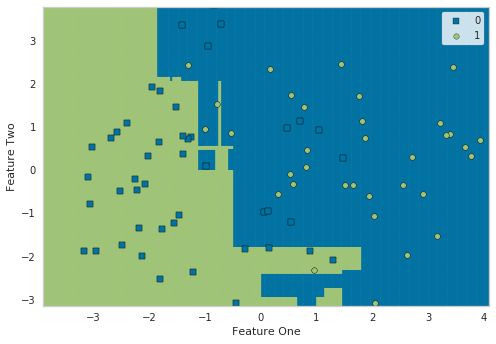

In [24]:
plot_model(best, plot = 'boundary')

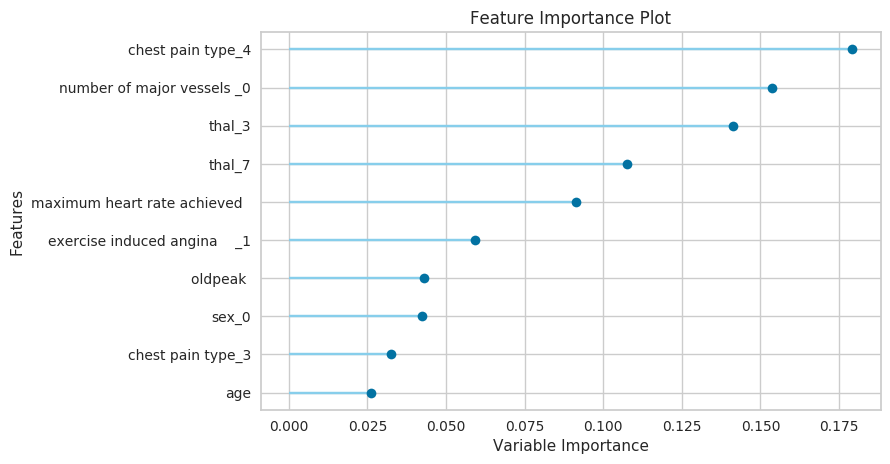

In [25]:
plot_model(best, plot = 'feature')

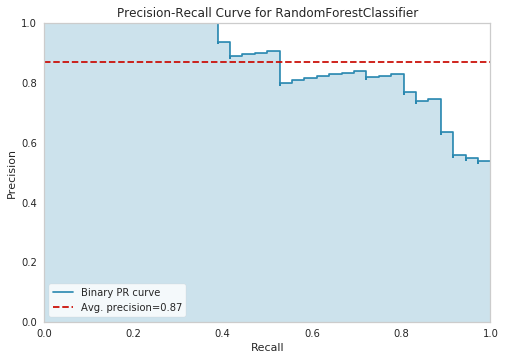

In [26]:
plot_model(best, plot = 'pr')

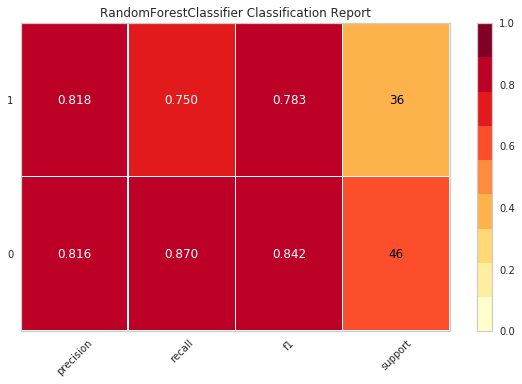

In [27]:
plot_model(best, plot = 'class_report')

## 8. Interpret Models With SHAP [For Compatible Model Types]

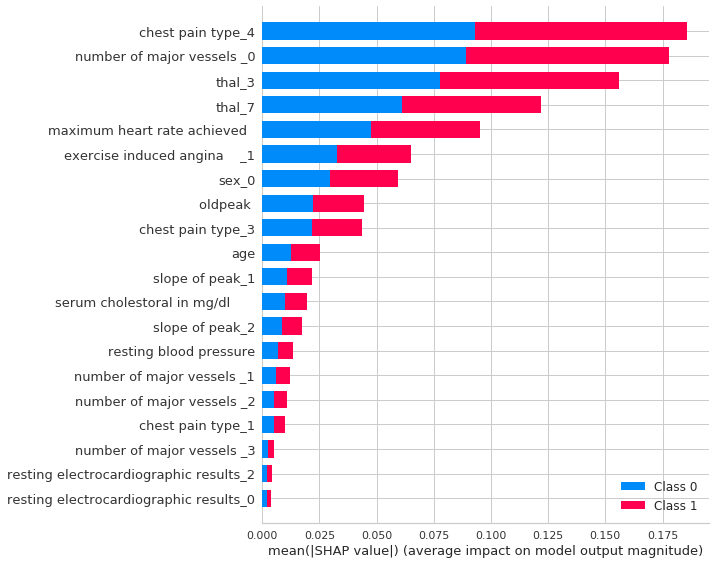

In [28]:
interpret_model(best)

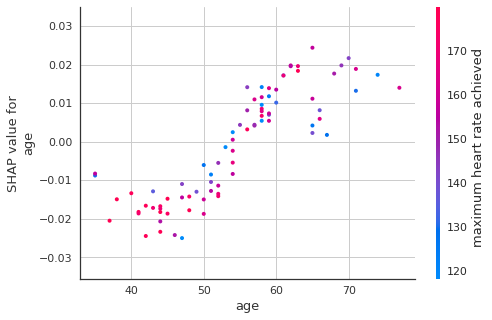

In [29]:
interpret_model(best, plot = 'correlation')

In [30]:
interpret_model(best, plot = 'reason', observation = 12)

## 9. Predict

In [31]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8171,0.8798,0.75,0.8182,0.7826,0.6252,0.627


,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,sex_0,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,...,number of major vessels _0,number of major vessels _1,number of major vessels _2,number of major vessels _3,thal_3,thal_6,thal_7,Disease,Label,Score
0,57.0,128.0,229.0,150.0,0.4,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0.5062
1,52.0,120.0,325.0,172.0,0.2,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8649
2,49.0,120.0,188.0,139.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.5840
3,71.0,110.0,265.0,130.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0.7283
4,58.0,100.0,248.0,122.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.6969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,53.0,142.0,226.0,111.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0.7977
78,77.0,125.0,304.0,162.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,0.5695
79,44.0,120.0,226.0,169.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9000
80,61.0,150.0,243.0,137.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.6204


## 10. Save and Load Model

In [32]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Disease',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features

In [33]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Disease',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criterion='gini', max_depth=4,
               

# PyCaret References

For more information and tutorials on PyCaret, please visit https://www.pycaret.org

PyCaret examples: https://github.com/pycaret/pycaret/tree/master/examples